In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import scipy.integrate as inta
import pandas as pd

In [2]:
inta.quad(lambda x: x**2,0,1)

(0.33333333333333337, 3.700743415417189e-15)

## * Finding $R_{max}$

[0.     0.0001 0.0002 0.0003 0.0004 0.0005 0.0006 0.0007 0.0008 0.0009
 0.001  0.0011 0.0012 0.0013 0.0014 0.0015 0.0016 0.0017 0.0018 0.0019
 0.002  0.0021 0.0022 0.0023 0.0024 0.0025 0.0026 0.0027 0.0028 0.0029
 0.003  0.0031 0.0032 0.0033 0.0034 0.0035 0.0036 0.0037] 36 [7.76070785e+02 7.17757750e+02 6.13946977e+02 4.85690920e+02
 3.55356970e+02 2.40461129e+02 1.50487157e+02 8.71019139e+01
 4.66260605e+01 2.30834889e+01 1.05692626e+01 4.47566049e+00
 1.75282018e+00 6.34868587e-01 2.12664459e-01 6.58823144e-02
 1.88757312e-02 5.00147134e-03 1.22560018e-03 2.77750445e-04
 5.82121215e-05 1.12829467e-05 2.02245914e-06 3.35260722e-07
 5.13959426e-08 7.28644547e-09 9.55302164e-10 1.15824746e-10
 1.29865818e-11 1.34653790e-12 1.29112958e-13 1.14484283e-14
 9.38737030e-16 7.11805452e-17 4.99108741e-18 3.23625526e-19]


Text(0.5, 1.0, 'Total charge between radii')

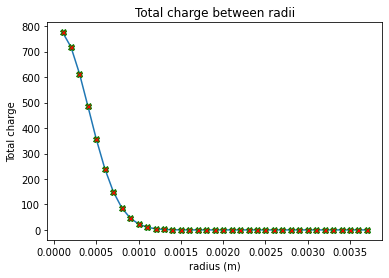

In [69]:
Nq = 200 #gain is 200 MeV
R = 2.5e+6 # Surface resistivity (ohm/square)
d = 100e-6 # Anode-readout plane separation (m)
eps_0 = 8.854e-12 # Permittivity of a vacuum (F/m)
k_1 = 3.3 # Relative permittivity of dielectric material (glue)
k_2 = 3.1 # Relative permittivity of dielectric material (mylar)
C = ((2*eps_0)/d)*((k_1*k_2)/(k_1+k_2)) # Capacitance per unit area with two dielectrics
h = 1/(R*C)
q = np.array([])
r = np.array([])
r = np.append(r,0)
t = 45e-9 #45 nano seconds 
e = 1.60217662e-19 #charge of an electron in coulombs
i = 0 #to keep track of index
found = False 
while found == False:
    r = np.append(r,r[i]+1e-4)
    charge = inta.quad(lambda x: 1/(2*t*h)*np.exp(-x**2/(4*t*h)),r[i],r[i+1])
    if charge[0] <= e:
        print(r,i,q)
        found = True
    q = np.append(q,charge[0])

    i += 1
r = np.delete(r,0)   
plt.plot(r,q,marker= "X",markerfacecolor='red',markeredgecolor = 'green')
plt.xlabel("radius (m)")
plt.ylabel("Total charge")
plt.title("Total charge between radii")

### Lets focus on the parts where Total charge is less than 1

Text(0.5, 1.0, 'Total charge between radii')

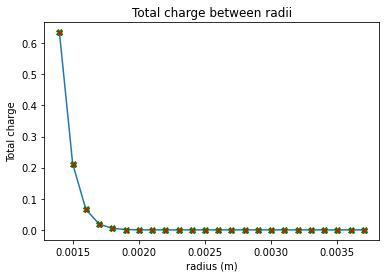

In [68]:

plt.plot(r[np.where(q<1)],q[np.where(q<1)],marker= "X",markerfacecolor='red',markeredgecolor = 'green')
plt.xlabel("radius (m)")
plt.ylabel("Total charge")
plt.title("Total charge between radii")

### Lets make a Data frame to show the values.

In [25]:
list(q)

[776.0707849617197,
 717.757750140507,
 613.9469765285878,
 485.6909195795655,
 355.3569698082,
 240.46112906481076,
 150.4871572697839,
 87.10191392902544,
 46.626060521895596,
 23.083488864414868,
 10.569262615718182,
 4.475660492642926,
 1.7528201770069307,
 0.6348685871557583,
 0.21266445933305037,
 0.06588231440673456,
 0.01887573120215323,
 0.005001471341602033,
 0.0012256001811081108,
 0.00027775044455940123,
 5.821212146770263e-05,
 1.1282946735517056e-05,
 2.0224591370810268e-06,
 3.3526072192446126e-07,
 5.139594263889443e-08,
 7.286445469347251e-09,
 9.553021635478307e-10,
 1.1582474561671752e-10,
 1.29865817794732e-11,
 1.3465379005432483e-12,
 1.2911295766207834e-13,
 1.1448428305229149e-14,
 9.387370302933272e-16,
 7.118054516966336e-17,
 4.991087413679018e-18,
 3.2362552617730786e-19,
 1.9404448739150593e-20]

In [40]:

ChangeR = pd.DataFrame( columns=["Radius (m)", "Total charge (C)"])
ChangeR["Radius (m)"] = pd.Series(r)
ChangeR["Total charge (C)"] = pd.Series(q)
ChangeR= ChangeR.drop([36])
ChangeR


,Radius (m),Total charge (C)
0,0.0001,7.760708e+02
1,0.0002,7.177578e+02
2,0.0003,6.139470e+02
3,0.0004,4.856909e+02
4,0.0005,3.553570e+02
5,0.0006,2.404611e+02
6,0.0007,1.504872e+02
7,0.0008,8.710191e+01
8,0.0009,4.662606e+01
9,0.0010,2.308349e+01


### Changing Area

[0.00000000e+00 9.98969506e-05 1.41275622e-04 ... 3.64589657e-03
 3.64726489e-03 3.64863270e-03] 1165 [7.75291758e+02 3.07112263e+02 2.26484843e+02 ... 1.79726660e-19
 1.72737917e-19 1.66020996e-19]


Text(0.5, 1.0, 'Total charge between radii')

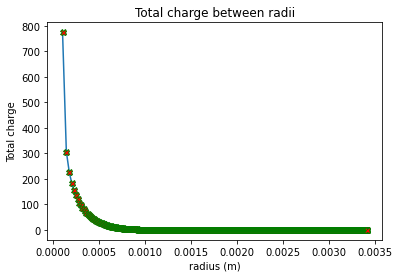

In [70]:
#our final radius should be 0.00365 as that is close to where the charge is essencially of that of an electron
R = 0.00365 #m
Segments = 1335 # number of segments with equal area pi*0.1^2  
Ar=np.array([])
for ith in np.arange(0,Segments,1):
    newr = R*np.sqrt(ith/Segments)
    Ar = np.append(Ar,newr)
Aq = np.array([])

j=0 #index
foundA = False 
while foundA == False:
    
    chargeA = inta.quad(lambda x: 1/(2*t*h)*np.exp(-x**2/(4*t*h)),Ar[j],Ar[j+1])
    if chargeA[0] <= e:
        print(Ar,j,Aq)
        foundA = True
    Aq = np.append(Aq,chargeA[0])

    j += 1
 
newAr=np.array([]) #Keeping radii that have total charge > e
for b in np.arange(0,len(Aq)+1,1):
    newAr = np.append(newAr,Ar[b])
newAr = np.delete(newAr,0) 
plt.plot(newAr,Aq,marker= "X",markerfacecolor='red',markeredgecolor = 'green')
plt.xlabel("radius (m)")
plt.ylabel("Total charge")
plt.title("Total charge between radii")



### Lets focus on Total charge less that 0.1

Text(0.5, 1.0, 'Total charge between radii')

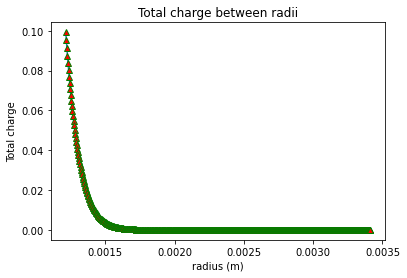

In [64]:
plt.plot(newAr[np.where(Aq < 0.1)],Aq[np.where(Aq < 0.1)],marker= "^",markerfacecolor='red',markeredgecolor = 'green')
plt.xlabel("radius (m)")
plt.ylabel("Total charge")
plt.title("Total charge between radii")


### Make a dataframe.

In [59]:
ChangeA = pd.DataFrame( columns=["Radius (m)", "Total charge (C)"])
ChangeA["Radius (m)"] = pd.Series(newAr)
ChangeA["Total charge (C)"] = pd.Series(Aq)
ChangeA

,Radius (m),Total charge (C)
0,0.000100,7.752918e+02
1,0.000141,3.071123e+02
2,0.000173,2.264848e+02
3,0.000200,1.835548e+02
4,0.000223,1.554772e+02
...,...,...
1161,0.003405,1.869982e-19
1162,0.003407,1.797267e-19
1163,0.003408,1.727379e-19
1164,0.003410,1.660210e-19
